# Degree distribution of Erdős-Rényi networks

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.special


The Erdős-Rényi (ER) model is a model for generating random networks where $N$ nodes are randomly connected such that the probability that a pair of nodes is linked is $p$. In this exercise, we are going to study the degree distribution of an ER network. First, **answer question a) in your MyCourses quiz** and get your personalized value of $p$. Then, continue.

## b) Generate and visualize the network
Create an instance of the ER network with $N = 1000$ nodes and $p = 0.01$. NetworkX has several functions that generates an ER network, but for a sparse (small $p$) network, use the `nx.fast_gnp_random_graph(N, p)` function. Visualize the network using the `nx.draw()` function.

- In most cases, you should get a connected network. However, there is a chance that the generated network is not connected. In this case, run the code again until you get a connected network.

In [5]:
# Create an Erdős-Rényi network G with N=1000 nodes and edge probability p from your MyCourses quiz and plot the degree distribution

N = 1000
p = 0.0095 # REPLACE WITH YOUR OWN VALUE OF p
G = nx.Graph()
# In the following, create an ER network G with the appropriate function.
# YOUR CODE HERE
G = nx.erdos_renyi_graph(N, p)

# raise NotImplementedError()

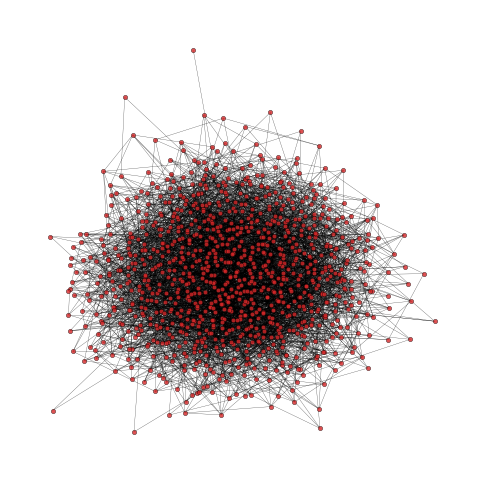

In [6]:
fig_vis, ax_vis = plt.subplots(figsize=(6, 6))

# An ER network with this p can have disconnected small components. Below, we'll just grab the largest connected component for the viz.
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

nx.draw(G0, ax=ax_vis, node_size=10, node_color='tab:red', linewidths=0.3, 
	width=0.2, edgecolors='black', alpha=0.8)

In [7]:
# Save the figure to current directory. Change the path if you wish. 
figure_path='./'
figure_filename = 'ER_visualized.pdf'
fig_vis.savefig(figure_path+figure_filename)

## c) The degree distribution
Plot the degree distribution of the generated ER network. First, get the histogram of the degree and normalize it to transform it into a probability mass function. Use numpy's histogram function with density set to True and bins from 0 to max of degree+1. 

In [16]:
def degree_distribution(G):
    '''
    Return the degree distribution of the given network G.
    
    Parameters
    ----------
    G : networkx graph

    Returns
    -------
    degree_values : numpy array or list
        Array of degree values, from 0 to maximum degree of G
    probabilities : numpy array or list
        Array of probabilities of each degree value
    '''
    probabilities = np.array([]) # probability that node has degree k
    degree_values = np.array([]) # integer sequence from 0 to maximum degree
    # YOUR CODE HERE
    degrees = list(dict(G.degree()).values())
    probabilities, degree_values = np.histogram(degrees, bins=range(max(degrees)+2), density=True)
    
    degree_values = degree_values[:-1]  # Remove the extra bin edge

    # raise NotImplementedError()

    ## TODO first, get a list of degrees of all nodes, then use numpy's histogram function to get two lists: 
    ## degrees from 0 to max of degrees +1, and probability densities associated with each degree
    ## (these two lists are outputs of histogram)
    ## see https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
    
    return degree_values, probabilities

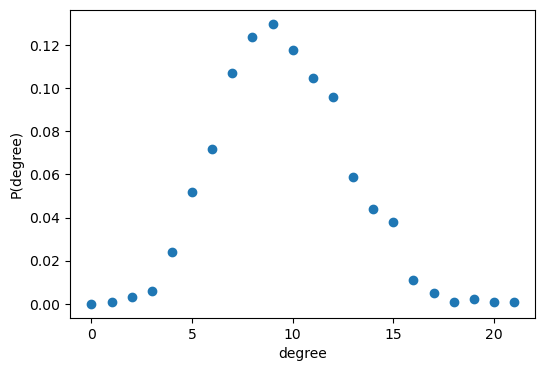

In [17]:
k, p_k = degree_distribution(G)

fig_ER_dist, ax_ER_dist = plt.subplots(figsize=(6, 4))
ax_ER_dist.plot(k, p_k, 'o')
ax_ER_dist.set_xlabel('degree')
ax_ER_dist.set_ylabel('P(degree)')
ax_ER_dist.set_xticks(k[:-1:5])

In [18]:
# Save the figure to current directory
figure_filename = 'ER_degree_distribution.pdf'
fig_ER_dist.savefig(figure_filename)

## d) Comparing empirical and theoretical degree distributions
Plot the Poisson distribution expected for an ER network and the degree distribution of the realized ER network in one plot.
- An ER network with large $N$ is expected to have the Poisson degree distribution with mean degree $N p$.
- The Poisson distribution with mean $\lambda$ is given by the following formula:
$$
P(k) = \frac{\lambda^k}{k!}e^{-\lambda}
$$
You can use the function `scipy.special.factorial(k)` for calculating the factorial $k!$.

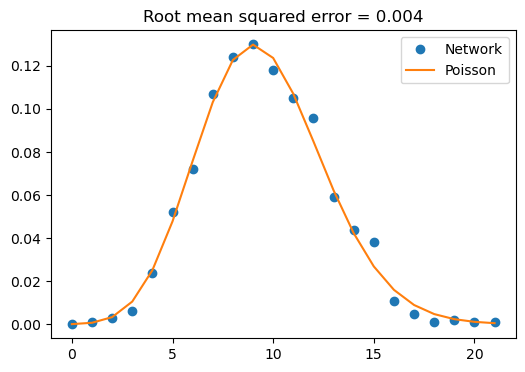

In [19]:
def poisson(k, mean):
    '''
    For the given k, returns the Poisson distribution P(k) with the given mean.
    '''
    prob = None # Replace!
    # YOUR CODE HERE
    prob = (mean**k) / scipy.special.factorial(k) * np.exp(-mean)
    # raise NotImplementedError()
    return prob

mean_degree = None # Replace!
# YOUR CODE HERE
mean_degree = np.mean(list(dict(G.degree()).values()))
# raise NotImplementedError()
poisson_dist = poisson(k, mean_degree)

fig_ER_Poisson, ax_ER_Poisson = plt.subplots(figsize=(6, 4))
ax_ER_Poisson.plot(k, p_k, 'o', label='Network')
ax_ER_Poisson.plot(k, poisson(k, mean_degree), '-', label='Poisson')
ax_ER_Poisson.legend()

rmse=np.sqrt(sum([(x[1]-poisson(x[0],mean_degree))**2 for x in zip(k,p_k)])/len(k))
ax_ER_Poisson.set_title('Root mean squared error = '+'%.3f'%rmse);


In [21]:
# Save the figure to current directory
figure_filename = 'ER_degree_distribution_with_Poisson.pdf'
fig_ER_Poisson.savefig(figure_filename)